In [109]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
iris = load_iris()

In [33]:
data = iris.data
labels = iris.target

le = LabelEncoder()
labels_enc = le.fit_transform(labels)


In [40]:
x_train, x_test, y_train, y_test = train_test_split(data, labels_enc, test_size=0.3, random_state=133)

Correlation Map


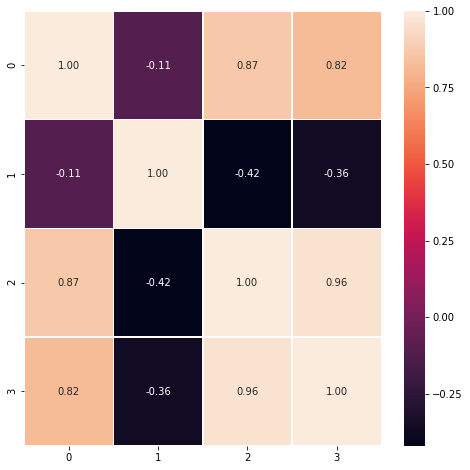

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
print('Correlation Map')
data_df = pd.DataFrame(data)
#correlation map view
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data_df.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()
data_df.describe()

In [37]:
cls = RandomForestClassifier(n_estimators=50, max_features=4, oob_score = True)
cls.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [45]:
predict = cls.predict(x_test)
acc_score=accuracy_score(y_test, predict)

In [47]:
print(f'accuracy score is {acc_score}')

accuracy score is 0.9555555555555556


In [49]:
feature_imp = pd.Series(cls.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.576419
petal length (cm)    0.395810
sepal length (cm)    0.015580
sepal width (cm)     0.012191
dtype: float64

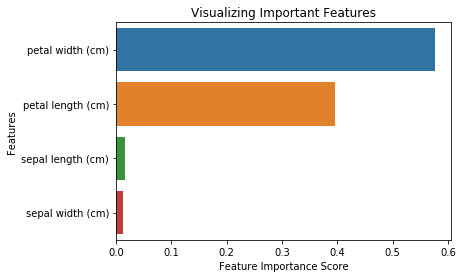

In [50]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [97]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

param = {
    'max_depth':3, 
    'eta':2, 
    'silent':1, 
    'objective':'multi:softprob', 
    'learning_rate': 0.1, 
    'num_class': 3
}
clf = xgb.XGBModel(**param)
clf.fit(x_train, y_train,verbose=True)


XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
     colsample_bytree=1, eta=2, gamma=0, learning_rate=0.1,
     max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
     n_estimators=100, n_jobs=1, nthread=None, num_class=3,
     objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1,
     scale_pos_weight=1, seed=None, silent=1, subsample=1)

[Text(0,0,'sepal length (cm)'),
 Text(0,0,'sepal width (cm)'),
 Text(0,0,'petal length (cm)'),
 Text(0,0,'petal width (cm)')]

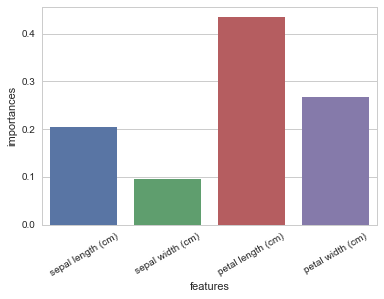

In [98]:
feature_df = pd.DataFrame(
    {'features': iris.feature_names,
     'importances': clf.feature_importances_
    })

sns.set(style="whitegrid")

plot = sns.barplot(x="features", y="importances", data=feature_df)
plot.set_xticklabels(iris.feature_names, rotation=30)

In [101]:
xgb_predict = booster.predict(x_test)

In [106]:
best_preds = np.asarray([np.argmax(line) for line in xgb_predict])
print(precision_score(y_test, best_preds, average='macro'))

0.9393939393939394


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x1a22e62668>>
Traceback (most recent call last):
  File "/Users/simasjoneliunas/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x1a22e6cc50>>
Traceback (most recent call last):
  File "/Users/simasjoneliunas/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


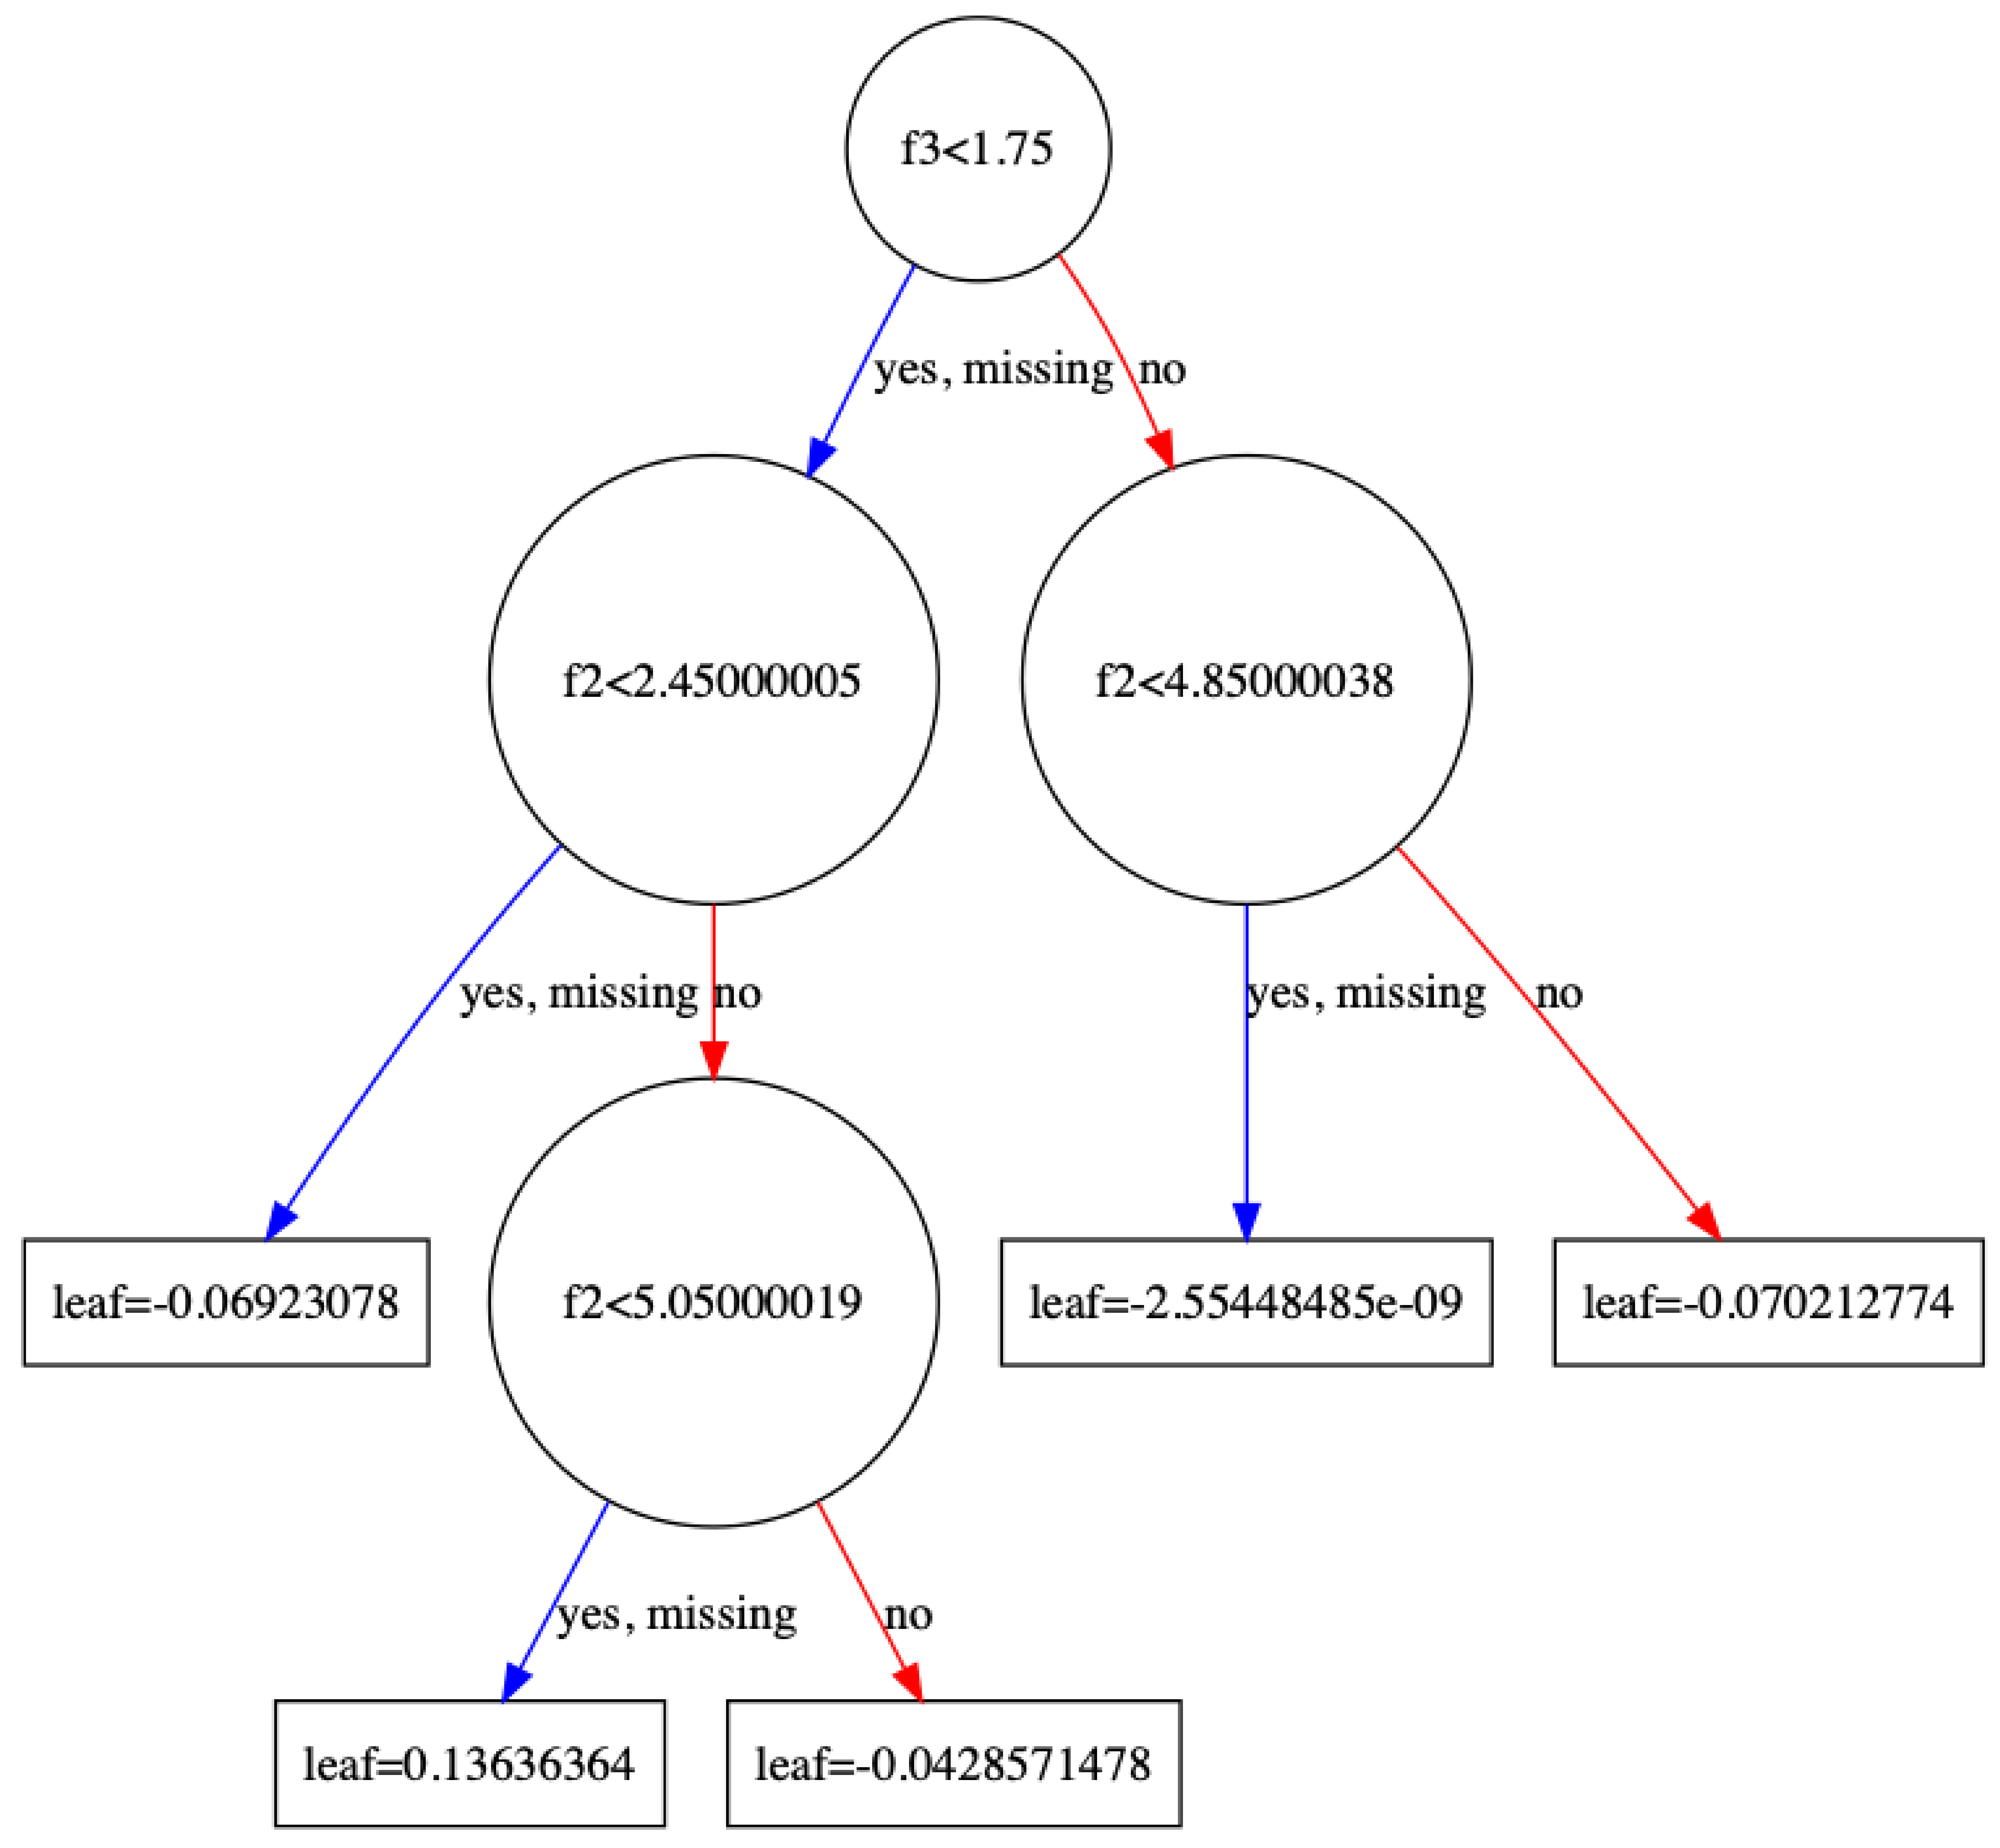

In [111]:
xgb.plot_tree(clf, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(150, 100)